In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import numpy as np

In [3]:
os.chdir("C:\pyproj\Datasets")

In [4]:
data=pd.read_csv("kc_housingdata.csv")

In [5]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
data_num=data[['price','bedrooms','bathrooms','sqft_living']]

In [8]:
data_num.head()

,price,bedrooms,bathrooms,sqft_living
0,221900.0,3,1.00,1180
1,538000.0,3,2.25,2570
2,180000.0,2,1.00,770
3,604000.0,4,3.00,1960
4,510000.0,3,2.00,1680


In [9]:
def scale_data(x):
    return (x-np.mean(x))/np.std(x)

data_scaled=data_num.apply(scale_data,axis=0)

In [10]:
data_scaled.head()

,price,bedrooms,bathrooms,sqft_living
0,-0.866717,-0.398737,-1.447464,-0.979835
1,-0.005688,-0.398737,0.175607,0.533634
2,-0.980849,-1.473959,-1.447464,-1.426254
3,0.174090,0.676485,1.149449,-0.130550
4,-0.081958,-0.398737,-0.149007,-0.435422


In [24]:
# Scaling using sklearn
import sklearn.preprocessing as preprocessing
dat_scaled=preprocessing.scale(data_num,axis=0)

In [32]:
type(dat_scaled)

numpy.ndarray

In [26]:
import sklearn.cluster as cluster
kmeans=cluster.KMeans(n_clusters=3,init="k-means++")
kmeans=kmeans.fit(dat_scaled)


In [27]:
kmeans.labels_

array([0, 2, 0, ..., 0, 2, 0])

In [28]:
type(kmeans)

sklearn.cluster.k_means_.KMeans

In [29]:
kmeans.cluster_centers_

array([[-0.46468042, -0.72681522, -0.86617881, -0.79253015],
       [ 1.88826213,  1.08534638,  1.53828912,  1.91997499],
       [-0.03526871,  0.35465742,  0.36895087,  0.22515342]])

In [34]:
# Elbow curve

from scipy.spatial.distance import cdist
K=range(1,20)
wss= []

for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(dat_scaled)
    wss.append(np.sum(np.min(cdist(dat_scaled,kmeans.cluster_centers_,'euclidean'),
                  axis=1))/dat_scaled.shape[0])


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

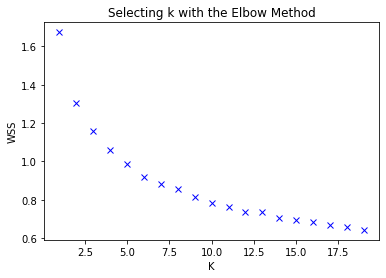

In [35]:
plt.plot(K,wss,'bx')
plt.xlabel('K')
plt.ylabel('WSS')
plt.title("Selecting k with the Elbow Method")

In [36]:
import sklearn.metrics as metrics
labels=cluster.KMeans(n_clusters=8,random_state=200).fit(dat_scaled).labels_

In [39]:
metrics.silhouette_score(dat_scaled,labels,metric='euclidean',sample_size=10000,random_state=200)

0.28313345009707275

In [40]:
for i in range(7,13):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(dat_scaled).labels_
    print ("Silhoutte score for k= "+str(i)+" is "+str(metrics.silhouette_score(dat_scaled,labels,metric="euclidean",
                                 sample_size=1000,random_state=200)))

Silhoutte score for k= 7 is 0.2763712840436325
Silhoutte score for k= 8 is 0.2903953376334379
Silhoutte score for k= 9 is 0.28508536235309107
Silhoutte score for k= 10 is 0.2806069718200512
Silhoutte score for k= 11 is 0.27578365881372385
Silhoutte score for k= 12 is 0.28154010556603204


In [41]:
def get_zprofiles(data,kmeans):
    data['Labels']=kmeans.labels_
    profile=data.groupby('Labels').mean().subtract(data.drop('Labels',axis=1).mean(),axis=1)
    profile=profile.divide(data.drop('Labels',axis=1).std(),axis=1)
    profile['Size']=data['Labels'].value_counts()
    return profile

In [43]:
# Creating profiles with clusters =8

kmeans=cluster.KMeans(n_clusters=8,random_state=200).fit(dat_scaled)
get_zprofiles(data=data_num.copy(),kmeans=kmeans)

,price,bedrooms,bathrooms,sqft_living,Size
Labels,,,,,
0,0.644691,0.344504,0.735787,0.992995,3132
1,-0.541668,-0.280571,-1.053502,-0.788342,4013
2,2.285528,0.922012,1.727444,2.194598,994
3,6.410548,1.250798,2.649467,3.697950,161
4,-0.494520,-1.571551,-1.211377,-1.073651,2445
5,0.278340,2.132508,1.031714,1.020664,1070
6,-0.203515,-0.493676,0.194295,-0.238244,5696
7,-0.263011,0.804906,0.129389,0.040654,4102
